### **Video Prediction Project - Lab CudaVision**
* Amit Kumar Rana
* Dhagash Desai
* Lina Hashem


### Table of Contents

* [1. Import Required Modules](#sec_1)
* [2. Datasets](#sec_2)
    * [2.1 Moving MNIST](#sec_2_1)
    * [2.2 KTH](#sec_2_2)
    * [2.3 Train/Test Dotaloader Statistics](#sec_2_3)
* [3. Models Architectures](#sec_3)
    * [3.1 Resnet18-style Encoder-Decoder](#sec_3_1)
    * [3.2 VGG19-style Encoder-Decoder](#sec_3_2)
    * [3.3 DCGAN-style Encoder-Decoder](#sec_3_3)
    * [3.4 ConvLSTM ](#sec_3_4)
    * [3.5 Models #Parameters Statistics](#sec_3_5)
* [4. Training Experiments](#sec_4)
    * [Training model](#sec_4_1)
    * [Visualizing Logs](#sec_4_2)
* [5. Results](#sec_5)
    * [5.1 Results on MMNIST](#sec_5_1)
        * [5.1.1 Visualize Best Metrices](#sec_5_1_1)
        * [5.1.2 Visualize Output for Random Samples](#sec_5_1_2)
        * [5.1.3 Models Comparison](#sec_5_1_3)
    * [5.2 Results on KTH ](#sec_5_2)
        * [5.2.1 Visualize Best Metrices](#sec_5_2_1)
        * [5.2.2 Visualize Output for Random Samples](#sec_5_2_2)
        * [5.2.3 Models Comparison](#sec_5_2_3)
* [6. References](#sec_6)

### Project Structure


```
.
├── checkpoints         # saving trained models
├── configs             # configs used for different experiments
├── data                # data directory 
│   └── KTH
│   └── MMNIST          
├── model_eval          # scripts for evaluating trained models
├── models              # building blocks of the model 
├── metrics_data        # stored data of computed metrics
├── results             # some images/GIFs computed from trained model
├── tboard_logs         # logs from our experiments
├── utils               # contains trainer to train model and some extra functionalities
└── eval.py             
└── train.py
└── summary.ipynb


```

### **1. Importing Required Module <a class="anchor" id="sec_1"></a>**

In [1]:
import os
import torch
from prettytable import PrettyTable
from utils.visualizations import save_grid_batch, save_gif_batch
from utils.utils import eval_dataset, count_model_params
from models.resnet import Resnet18Encoder, Resnet18Decoder
from models.vgg import VGGEncoder, VGGDecoder
from models.dcgan import DCGANEncoder, DCGANDecoder
from models.predictorLSTM import predictor
from eval import eval
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### **2. Datasets <a class="anchor" id="sec_2"></a>**

####  **2.1 Moving MNIST <a class="anchor" id="sec_2_1"></a>**

In [ ]:
mmnist_test_loader = eval_dataset(dataset = "MMNIST", batch_size=20)


In [ ]:
sample_batch = next(iter(mmnist_test_loader))
print("batch shape: (seq_len, batch_size, channels, height, width")
sample_batch.shape

In [ ]:
save_grid_batch(sample_batch, nsamples=5, text = "mmnist_test", show = True)

In [ ]:
save_gif_batch(sample_batch, nsamples =5, text = "mmnist_test", show =True)

####  **2.2 KTH <a class="anchor" id="sec_2_2"></a>**

In [ ]:
kth_test_loader = eval_dataset(dataset = "KTH", batch_size=20)

In [ ]:
sample_batch = next(iter(kth_test_loader))
print("batch shape: (seq_len, batch_size, channels, height, width")
sample_batch.shape

In [ ]:
save_grid_batch(sample_batch, nsamples=5, text = "kth_test", show = True)

In [ ]:
save_gif_batch(sample_batch, nsamples =5, text = "kth_test", show =True)

### **3. Models Architectures <a class="anchor" id="sec_3"></a>**

####  **3.1 Resnet18-style Encoder-Decoder <a class="anchor" id="sec_3_1"></a>**

In [ ]:
resnet_encoder = Resnet18Encoder()
resnet_encoder = resnet_encoder.to(device)
resnet_encoder


In [ ]:
resnet_decoder = Resnet18Decoder(skip_connection=False)
resnet_decoder = resnet_decoder.to(device)
resnet_decoder

####  **3.2 VGG19-style Encoder-Decoder <a class="anchor" id="sec_3_2"></a>**

In [ ]:
vgg_encoder = VGGEncoder()
vgg_encoder = vgg_encoder.to(device)
vgg_encoder

In [ ]:
vgg_decoder = VGGDecoder(skip_connection=False)
vgg_decoder = vgg_decoder.to(device)
vgg_decoder

####  **3.3 DCGAN-style Encoder-Decoder <a class="anchor" id="sec_3_3"></a>**

In [ ]:
dcgan_encoder = DCGANEncoder()
dcgan_encoder = dcgan_encoder.to(device)
dcgan_encoder

In [ ]:
dcgan_decoder = DCGANDecoder(skip_connection=False)
dcgan_decoder = dcgan_decoder.to(device)
dcgan_decoder

####  **3.4 ConvLSTM <a class="anchor" id="sec_3_4"></a>**

In [ ]:
predictor_lstm = predictor(batch_size= 20, device = device, mode="zeros", num_layers=2)
predictor_lstm

####  **3.5 Models Paramters Statistics <a class="anchor" id="sec_3_5"></a>**

In [ ]:
resnet_encoder_params = count_model_params(resnet_encoder)
resnet_decoder_params = count_model_params(resnet_decoder)
resnet_decoder_skip = Resnet18Decoder(skip_connection=True).to(device)
resnet_decoder_skip_params = count_model_params(resnet_decoder_skip)

vgg_encoder_params = count_model_params(vgg_encoder)
vgg_decoder_params = count_model_params(vgg_decoder)
vgg_decoder_skip = VGGDecoder(skip_connection=True).to(device)
vgg_decoder_skip_params = count_model_params(vgg_decoder_skip)

dcgan_encoder_params = count_model_params(dcgan_encoder)
dcgan_decoder_params = count_model_params(dcgan_decoder)
dcgan_decoder_skip = DCGANDecoder(skip_connection=True).to(device)
dcgan_decoder_skip_params = count_model_params(dcgan_decoder_skip)

convlstm_2_params = count_model_params(predictor_lstm)
predictor_lstm_3 = predictor(batch_size= 20, device = device, mode="zeros", num_layers=3)
convlstm_3_params = count_model_params(predictor_lstm_3)


resnet_params_2 = count_model_params(resnet_encoder) + count_model_params(resnet_decoder) + count_model_params(predictor_lstm)

In [ ]:
params_table = PrettyTable()
params_table.field_names = ["Model Type", "#layers in ConvLSTM", "Skip Connection", "num parametes"]
params_table.add_row(["Resnet18", 2, False, resnet_encoder_params+resnet_decoder_params+convlstm_2_params])
params_table.add_row(["Resnet18", 2, True, resnet_encoder_params+resnet_decoder_skip_params+convlstm_2_params])
params_table.add_row(["Resnet18", 3, False, resnet_encoder_params+resnet_decoder_params+convlstm_3_params])
params_table.add_row(["Resnet18", 3, True, resnet_encoder_params+resnet_decoder_skip_params+convlstm_3_params])

params_table.add_row(["VGG19", 2, False, vgg_encoder_params+vgg_decoder_params+convlstm_2_params])
params_table.add_row(["VGG19", 2, True, vgg_encoder_params+vgg_decoder_skip_params+convlstm_2_params])
params_table.add_row(["VGG19", 3, False, vgg_encoder_params+vgg_decoder_params+convlstm_3_params])
params_table.add_row(["VGG19", 3, True, vgg_encoder_params+vgg_decoder_skip_params+convlstm_3_params])

params_table.add_row(["DCGAN", 2, False, dcgan_encoder_params+dcgan_decoder_params+convlstm_2_params])
params_table.add_row(["DCGAN", 2, False, dcgan_encoder_params+dcgan_decoder_skip_params+convlstm_2_params])
params_table.add_row(["DCGAN", 3, False, dcgan_encoder_params+dcgan_decoder_params+convlstm_3_params])
params_table.add_row(["DCGAN", 3, False, dcgan_encoder_params+dcgan_decoder_skip_params+convlstm_3_params])

params_table

### **4. Training Experiments <a class="anchor" id="sec_4"></a>**

* configs can be modified to train models from all possible combinations.
* configs for our training are located in configs folder
* For demo purpose we created summary_config.yaml 
* Logs can be visualized using %tensorboad --logdir logs/
* **NOTE:** training with gpu is recommended

In [ ]:
%run train.py -c configs/summary_config.yaml

### **5. Results <a class="anchor" id="sec_5"></a>**

**NOTE:**
* It takes longer time to compute evalutation metrics on system without cuda support
* All the images will be stored in results folder
* Data about metrics will be stored in metrics_data folder with following row order: LPIPS, SSIM, PSNR, MSE, MAE

#### **5.1 Results on MMNIST <a class="anchor" id="sec_5_1"></a>**

##### **5.1.1 Visualizae Best Metrices <a class="anchor" id="sec_5_1_1"></a>**

In [2]:
SAVED_MODEL_PATH = "checkpoints/mmnist_resnet_2_lpips_resnet_convlstm/model_90.pth"
evaluation = eval(model_path = SAVED_MODEL_PATH)
# evaluation.visualize_best_metrices()

##### **5.1.2 Visualizae Output for Random Samples <a class="anchor" id="sec_5_1_2"></a>**

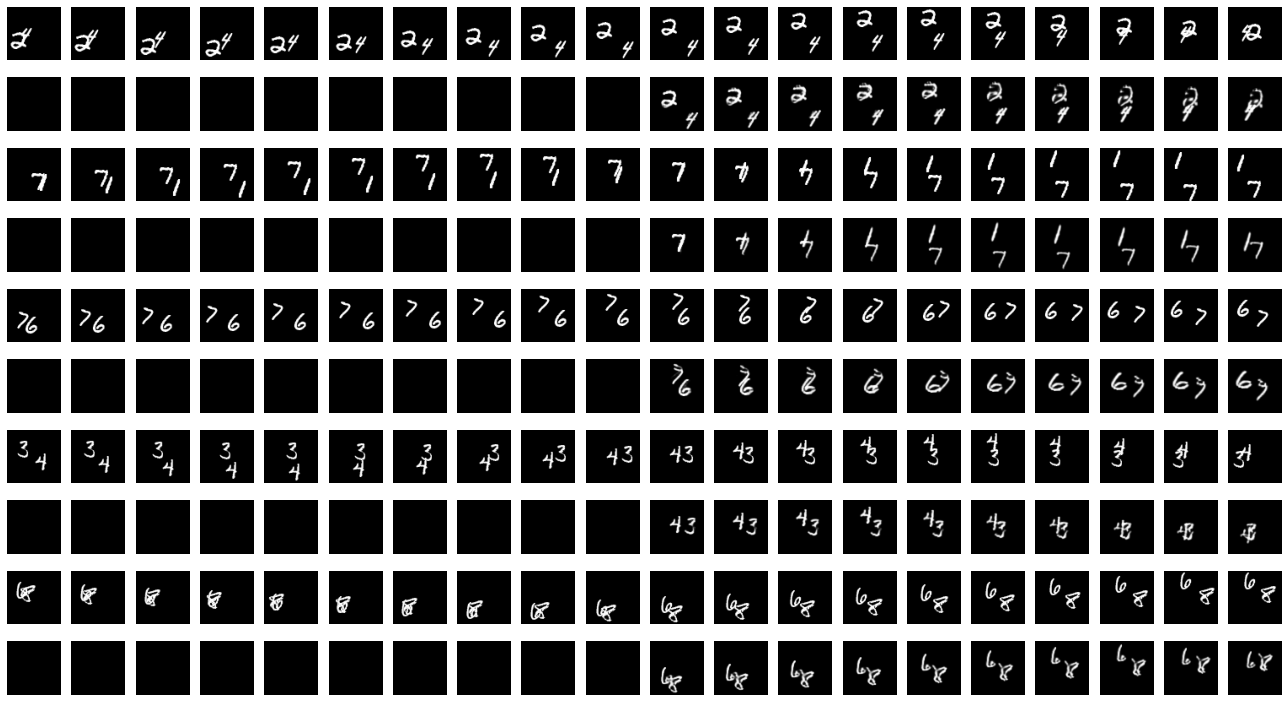

In [4]:
random_batch = next(iter(evaluation.test_loader)).to(device)
gt_seq, pred_seq = evaluation.generate_future_sequences(random_batch)
save_grid_batch(random_batch, torch.cat((gt_seq,pred_seq),dim=0), batch_first=False, text="random_batch_mmnist",show=True)


In [5]:
save_gif_batch(random_batch, torch.cat((gt_seq,pred_seq),dim=0), batch_first=False, text="random_batch_mmnist",show=True)

------------Past Frames (First 10 frames of the sequence)----------------


------------Future Frames (Next 10 frames of the sequence)----------------


------------predicted frames(predicted 10 frames of the sequence)----------------


##### **5.1.3 Models Comparison <a class="anchor" id="sec_5_1_3"></a>**

<img src="images/plot_mmnist_compare.png"
     alt="mmnist"
     style="float: left; margin-right: 10px;" />

#### **5.2 Results on KTH <a class="anchor" id="sec_5_2"></a>**

##### **5.2.1 Visualizae Best Metrices <a class="anchor" id="sec_5_2_1"></a>**

In [ ]:
SAVED_MODEL_PATH = "checkpoints/kth/model_170.pth"
evaluation = eval(model_path = SAVED_MODEL_PATH)
evaluation.visualize_best_metrices()

##### **5.2.2 Visualizae Output for Random Samples <a class="anchor" id="sec_5_2_2"></a>**

In [ ]:
random_batch = next(iter(evaluation.test_loader)).to(device)
gt_seq, pred_seq = evaluation.generate_future_sequences(random_batch)
save_grid_batch(random_batch, torch.cat((gt_seq,pred_seq),dim=0), batch_first=False, text="random_batch_kth",show=True)

In [ ]:
save_gif_batch(random_batch, torch.cat((gt_seq,pred_seq),dim=0), batch_first=False, text="random_batch_kth",show=True)

##### **5.2.3 Models Comparison <a class="anchor" id="sec_5_2_3"></a>**

<img src="images/plot_kth_compare.png"
     alt="kth"
     style="float: left; margin-right: 10px;" />

### **6. References <a class="anchor" id="sec_6"></a>**